In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
cell_df = pd.read_csv("cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


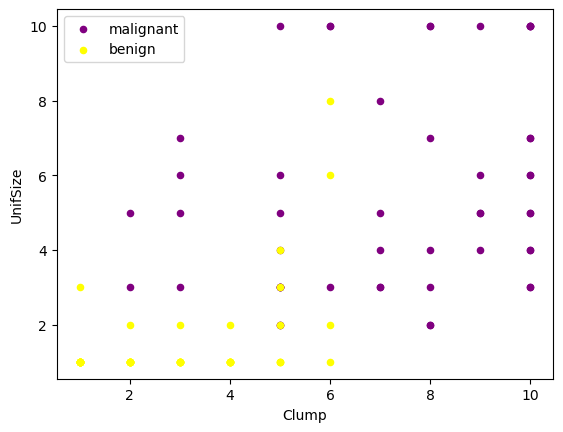

In [6]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Purple', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

In [7]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [10]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [11]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'NormNucl', 'Mit']]
x = np.asarray(feature_df)
x[:5]

array([[ 5,  1,  1,  1,  2,  1,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  1,  1]], dtype=int64)

In [13]:
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y[:5]

array([2, 2, 2, 2, 2])

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=4)
print(xtrain.shape, xtest.shape)
print(ytrain.shape, ytest.shape)

(546, 8) (137, 8)
(546,) (137,)


In [18]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(xtrain, ytrain)

SVC()

In [29]:
yhat = clf.predict(xtest)
print(ytest[:20])
print(yhat[:20])

[2 4 2 4 2 2 2 2 4 2 2 4 4 4 4 2 2 2 2 2]
[2 4 2 4 2 2 2 2 4 2 2 4 4 4 4 2 2 2 2 2]


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


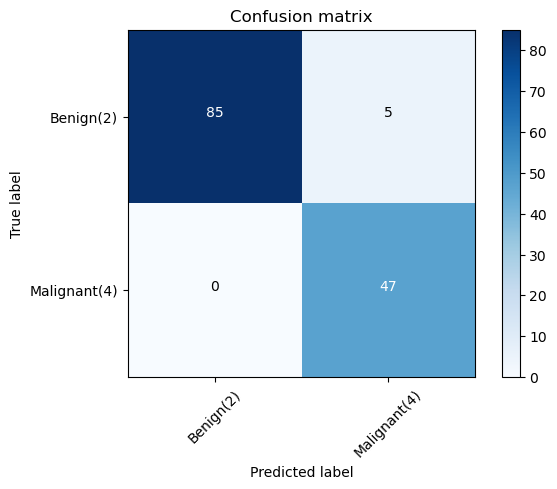

In [28]:
cnf_matrix = confusion_matrix(ytest, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(ytest, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [31]:
from sklearn.metrics import f1_score
f1_score(ytest, yhat, average='weighted') 

0.9639038982104676

In [32]:
from sklearn.metrics import jaccard_score
jaccard_score(ytest, yhat,pos_label=2)

0.9444444444444444